In [47]:
from scipy.io import wavfile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal

In [48]:
mpl.rcParams["savefig.pad_inches"] = 0

In [31]:
_, original_signal = wavfile.read("..\\datasets\\raw\\dataset_full\\MVP\\New_MVP_001.wav")

In [32]:
augmented_signal = original_signal + np.random.rand(original_signal.shape[0]) * 1000

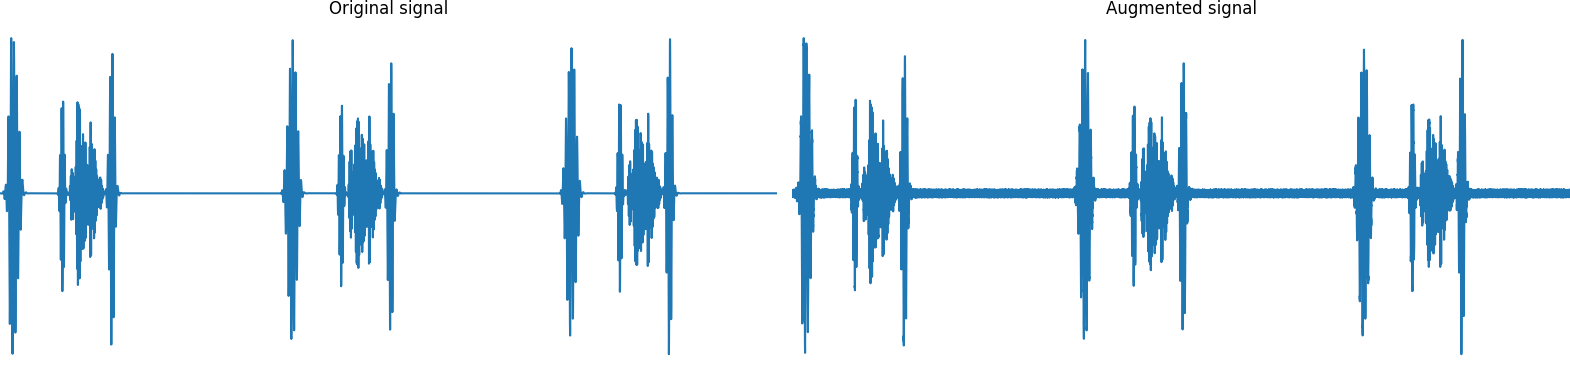

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.set_axis_off()
ax1.plot(original_signal)
ax1.set_title("Original signal")
ax2.set_axis_off()
ax2.plot(augmented_signal)
ax2.set_title("Augmented signal")
ax1.margins(x=0)
ax2.margins(x=0)
fig.tight_layout()

In [34]:
filter = signal.butter(4, (20, 150), btype='bandpass', output='sos', fs=8000)
preprocessed_original_signal = (original_signal / np.max(np.abs(original_signal))) * 32767
preprocessed_original_signal = signal.sosfilt(filter, preprocessed_original_signal)
preprocessed_original_signal = signal.resample(preprocessed_original_signal, 20000)
preprocessed_augmented_signal = (augmented_signal / np.max(np.abs(augmented_signal))) * 32767
preprocessed_augmented_signal = signal.sosfilt(filter, preprocessed_augmented_signal)
preprocessed_augmented_signal = signal.resample(preprocessed_augmented_signal, 20000)

Text(0.5, 1.0, 'Preprocessed Augmented signal')

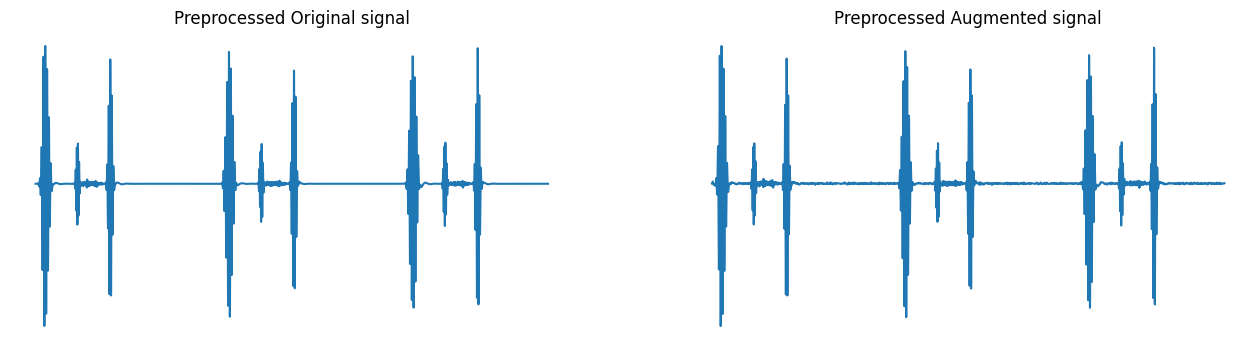

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.set_axis_off()
ax1.plot(preprocessed_original_signal)
ax1.set_title("Preprocessed Original signal")
ax2.set_axis_off()
ax2.plot(preprocessed_augmented_signal)
ax2.set_title("Preprocessed Augmented signal")

In [36]:
print(np.correlate(preprocessed_original_signal, preprocessed_augmented_signal)[0])

426942407031.2821


In [37]:
print(np.correlate(preprocessed_original_signal, preprocessed_original_signal)[0])

430014196000.736
